# Experiment 5:
## Reconstruction with dithering

This experiment shows the behaviour of the regularized reconstruction method with dithering structural assumptions:
- Sparsity in standard basis,
- Sparsity in single level 2D Haar wavelets and
- Generative model.

In [1]:
import numpy as np;
import numpy.linalg as linalg;

import matplotlib.pyplot as plt;

import torch;
import torch.nn as nn;
import torch.nn.functional as F;
import torch.optim as optim;

import pywt;

from torch.utils.data import DataLoader;
import torchvision;

import pickle;
import time;
import random;
import math;

from IPython.display import clear_output;

import MNIST_utils as MNIST;
import MNIST_generative as generative;
import sparsity_utils as sparsity;
import general_utils as utils;

# Initialization

In [2]:
(train_data, test_data), (train_loader, test_loader) = MNIST.load_dataset();

noise = 0.1;
mspace_standard =  np.linspace(1, 15000, 20, dtype='int');
mspace_haar = np.linspace(1, 5000, 20, dtype=int);
mspace_gen =  np.linspace(1, 2000, 20, dtype='int');

sparsity_standard = 100;
sparsity_haar = 40;

repetitions = 3;

lamb = 18;

# Sparsity in standard basis experiment

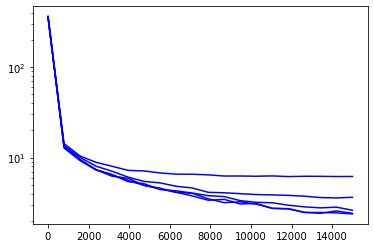

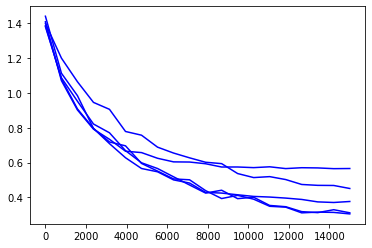

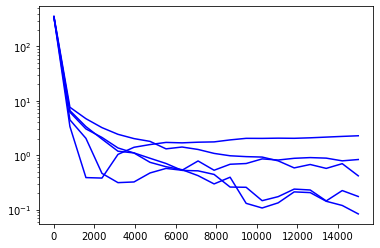

In [7]:
results_sparsity = [len(mspace_standard)*[0] for i in range(5)];
results_sparsity_normerr = [len(mspace_standard)*[0] for i in range(5)];
results_sparsity_raderr = [len(mspace_standard)*[0] for i in range(5)];

projector = lambda x : sparsity.HT(x, sparsity_standard);

utils.reset_seeds();
for i in range(5):
    x_true = MNIST.getImageAsVector(test_loader, i);
    true_radius = linalg.norm(x_true);
    
    for j in range(len(mspace_standard)):
        m = mspace_standard[j];
        
        accum = 0.0;
        accum_normerr = 0.0;
        accum_raderr = 0.0;
        for k in range(repetitions):  
            A, q = utils.generateMeasurements_Gaussian_dithering(x_true, m, noise, lamb);        
            y, acc, _ =  MNIST.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 1, iterations = 100);
            accum += acc;
            accum_normerr += utils.normelized_error(x_true, y);
            accum_raderr += abs(true_radius - linalg.norm(y));
        results_sparsity[i][j] = accum/repetitions;
        results_sparsity_normerr[i][j] = accum_normerr/repetitions;
        results_sparsity_raderr[i][j] = accum_raderr/repetitions;
    
    clear_output(wait=True);
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_standard, results_sparsity[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('linear');
        plt.plot(mspace_standard, results_sparsity_normerr[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_standard, results_sparsity_raderr[k], c='b');
    plt.show();

# Single level Haar wavelets experiment

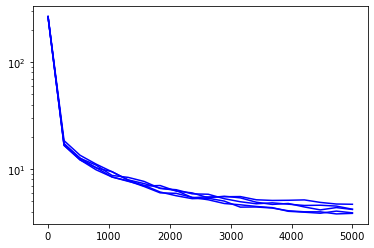

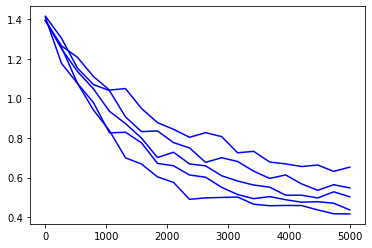

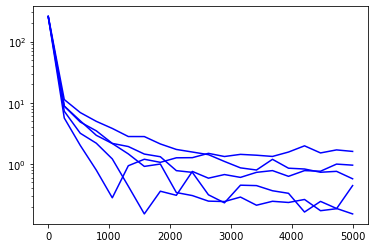

In [13]:
results_haar = [len(mspace_haar)*[0] for i in range(5)];
results_haar_normerr = [len(mspace_haar)*[0] for i in range(5)];
results_haar_raderr = [len(mspace_haar)*[0] for i in range(5)];

projector = lambda x : sparsity.HT_transform(x, sparsity_haar, sparsity.haar2d, sparsity.inverse_haar2d)

utils.reset_seeds();
for i in range(5):
    x_true = MNIST.getImageAsVector(test_loader, i);
    true_radius = linalg.norm(x_true);
    
    for j in range(len(mspace_haar)):
        m = mspace_haar[j];
        
        accum = 0.0;
        accum_normerr = 0.0;
        accum_raderr = 0.0;
        for k in range(repetitions):
            A, q = utils.generateMeasurements_Gaussian_dithering(x_true, m, noise, lamb);        
            y, acc, _ =  MNIST.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 1, iterations = 100);
            accum += acc;
            accum_normerr += utils.normelized_error(x_true, y);
            accum_raderr += abs(true_radius - linalg.norm(y));
        results_haar[i][j] = accum/repetitions;
        results_haar_normerr[i][j] = accum_normerr/repetitions;
        results_haar_raderr[i][j] = accum_raderr/repetitions;
    
    clear_output(wait=True);
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_haar, results_haar[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('linear');
        plt.plot(mspace_haar, results_haar_normerr[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_haar, results_haar_raderr[k], c='b');
    plt.show();

# Generative model

In [12]:
utils.reset_seeds();
_, autoEncoder = generative.createNetwork(3, 100);
generative.trainNetwork(autoEncoder, train_loader);

projector = lambda x : generative.project(x, autoEncoder , num_epochs = 50, learning_rate = 0.001);

C:\Users\jever\anaconda3\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	 Train_loss: 1.069325
Epoch: 2 	 Train_loss: 0.498542
Epoch: 3 	 Train_loss: 0.370502
Epoch: 4 	 Train_loss: 0.312300
Epoch: 5 	 Train_loss: 0.281547
Epoch: 6 	 Train_loss: 0.260119
Epoch: 7 	 Train_loss: 0.243736
Epoch: 8 	 Train_loss: 0.231814
Epoch: 9 	 Train_loss: 0.222426
Epoch: 10 	 Train_loss: 0.214850
Epoch: 11 	 Train_loss: 0.207706
Epoch: 12 	 Train_loss: 0.202160
Epoch: 13 	 Train_loss: 0.197265
Epoch: 14 	 Train_loss: 0.192909
Epoch: 15 	 Train_loss: 0.188500
Epoch: 16 	 Train_loss: 0.183898
Epoch: 17 	 Train_loss: 0.179991
Epoch: 18 	 Train_loss: 0.175919
Epoch: 19 	 Train_loss: 0.172831
Epoch: 20 	 Train_loss: 0.169244


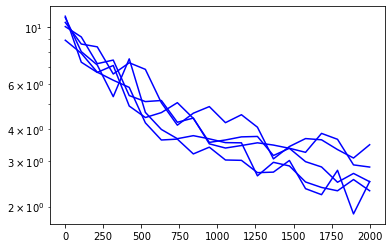

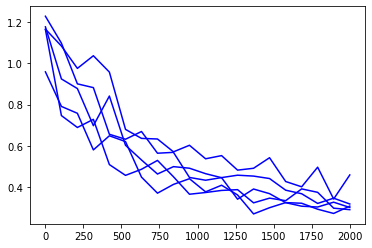

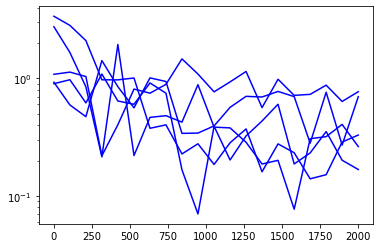

In [16]:
results_gen = [len(mspace_gen)*[0] for i in range(5)]
results_gen_normerr = [len(mspace_gen)*[0] for i in range(5)];
results_gen_raderr = [len(mspace_gen)*[0] for i in range(5)];

projector = lambda x : generative.project(x, autoEncoder , num_epochs = 50, learning_rate = 0.001);

utils.reset_seeds();
for i in range(5):
    x_true = MNIST.getImageAsVector(test_loader, i);
    true_radius = linalg.norm(x_true);
    
    for j in range(len(mspace_gen)):
        m = mspace_gen[j];
        
        accum = 0.0;
        accum_normerr = 0.0;
        accum_raderr = 0.0;
        for k in range(repetitions):
            A, q = utils.generateMeasurements_Gaussian_dithering(x_true, m, noise, lamb);        
            y, acc, _ =  MNIST.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 50);
            accum += acc;
            accum_normerr += utils.normelized_error(x_true, y);
            accum_raderr += abs(true_radius - linalg.norm(y));
        results_gen[i][j] = accum/repetitions;
        results_gen_normerr[i][j] = accum_normerr/repetitions;
        results_gen_raderr[i][j] = accum_raderr/repetitions;
    
    clear_output(wait=True);
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_gen, results_gen[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('linear');
        plt.plot(mspace_gen, results_gen_normerr[k], c='b');
    plt.show();
    for k in range(i+1):
        plt.yscale('log');
        plt.plot(mspace_gen, results_gen_raderr[k], c='b');
    plt.show();

# Processing

In [18]:
utils.saveData((results_sparsity, results_sparsity_normerr, results_sparsity_raderr,
          results_haar, results_haar_normerr,results_haar_raderr ,
          results_gen, results_gen_normerr , results_gen_raderr), "results_data/5_dithering.dat");

In [3]:
(results_sparsity, results_sparsity_normerr, results_sparsity_raderr,
          results_haar, results_haar_normerr,results_haar_raderr ,
          results_gen, results_gen_normerr , results_gen_raderr) = utils.loadData("results_data/5_dithering.dat");

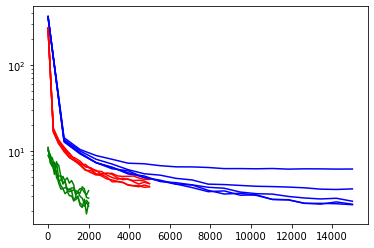

In [4]:
plt.yscale('log');
for i in range(5):
    plt.plot(mspace_standard, results_sparsity[i], 'b');
    plt.plot(mspace_haar, results_haar[i], 'r');
    plt.plot(mspace_gen,results_gen[i], 'g');

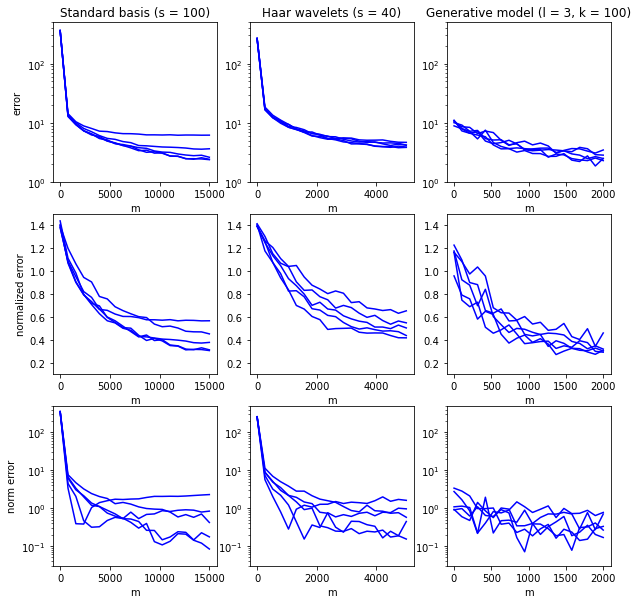

In [6]:
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)

ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)

ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)

ax1.set_yscale('log');
for i in range(5):
    ax1.plot(mspace_standard, results_sparsity[i], 'b');
ax1.set_title("Standard basis (s = 100)");
ax1.set_xlabel("m");
ax1.set_ylabel("error");
ax1.set_ylim([1,500]);

ax2.set_yscale('log');
for i in range(5):
    ax2.plot(mspace_haar, results_haar[i], 'b');
ax2.set_title("Haar wavelets (s = 40)"); 
ax2.set_xlabel("m");
ax2.set_ylim([1,500]);

ax3.set_yscale('log');
for i in range(5):
    ax3.plot(mspace_gen, results_gen[i], 'b');
ax3.set_title("Generative model (l = 3, k = 100)");
ax3.set_xlabel("m");
ax3.set_ylim([1,500]);


for i in range(5):
    ax4.plot(mspace_standard, results_sparsity_normerr[i], 'b');
ax4.set_xlabel("m");
ax4.set_ylabel("normalized error");
ax4.set_ylim([0.1,1.5]);

for i in range(5):
    ax5.plot(mspace_haar, results_haar_normerr[i], 'b');
ax5.set_xlabel("m");
ax5.set_ylim([0.1,1.5]);

for i in range(5):
    ax6.plot(mspace_gen, results_gen_normerr[i], 'b');
ax6.set_xlabel("m");
ax6.set_ylim([0.1,1.5]);




ax7.set_yscale('log');
for i in range(5):
    ax7.plot(mspace_standard, results_sparsity_raderr[i], 'b');
ax7.set_xlabel("m");
ax7.set_ylabel("norm error");
ax7.set_ylim([0.03,500]);

ax8.set_yscale('log');
for i in range(5):
    ax8.plot(mspace_haar, results_haar_raderr[i], 'b');
ax8.set_xlabel("m");
ax8.set_ylim([0.03,500]);

ax9.set_yscale('log');
for i in range(5):
    ax9.plot(mspace_gen, results_gen_raderr[i], 'b');
ax9.set_xlabel("m");
ax9.set_ylim([0.03,500]);


f.savefig("results_images/dithering_varying.png", dpi=300);